Testing config: {'hidden_layer_sizes': (5,), 'activation': 'relu', 'learning_rate_init': 0.01, 'tol': 1e-06, 'early_stopping': True}
Iteration 1, loss = 1.12986671
Validation score: 0.416667
Iteration 2, loss = 1.06686609
Validation score: 0.416667
Iteration 3, loss = 1.00765210
Validation score: 0.416667
Iteration 4, loss = 0.95249348
Validation score: 0.416667
Iteration 5, loss = 0.90174806
Validation score: 0.416667
Iteration 6, loss = 0.85585483
Validation score: 0.500000
Iteration 7, loss = 0.81488717
Validation score: 0.500000
Iteration 8, loss = 0.77863312
Validation score: 0.500000
Iteration 9, loss = 0.74657636
Validation score: 0.500000
Iteration 10, loss = 0.71796027
Validation score: 0.500000
Iteration 11, loss = 0.69239186
Validation score: 0.500000
Iteration 12, loss = 0.66966780
Validation score: 0.500000
Iteration 13, loss = 0.64947659
Validation score: 0.500000
Iteration 14, loss = 0.63130280
Validation score: 0.500000
Iteration 15, loss = 0.61510415
Validation score: 

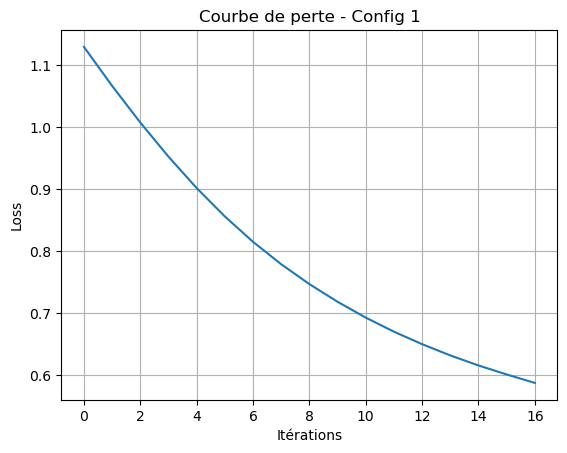

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Préparation des données
df = pd.read_csv('IRIS.csv')
X = df.drop('species', axis=1)
y = df['species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Liste des expériences
configs = [
    #{"hidden_layer_sizes": (2,), "activation": "relu", "learning_rate_init": 0.001, "max_iter":3000 , "early_stopping":False},
    #{"hidden_layer_sizes": (2,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 900 , "early_stopping":False},
        {"hidden_layer_sizes": (5,), "activation": "relu", "learning_rate_init": 0.01, "tol":1e-6 , "early_stopping":True},

    #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 1600 , "early_stopping":False},
    #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 500 , "early_stopping":False},
        #{"hidden_layer_sizes": (3,), "activation": "relu", "learning_rate_init": 0.1, "tol":1e-6 , "early_stopping":True},


    
    #{"hidden_layer_sizes": (4,), "activation": "relu", "learning_rate_init": 0.001, "max_iter": 2200 , "early_stopping":False},
    #{"hidden_layer_sizes": (4,), "activation": "relu", "learning_rate_init": 0.01, "max_iter": 500 , "early_stopping":False},
     #{"hidden_layer_sizes": (4,), "activation": "relu", "learning_rate_init": 0.1, "max_iter": 200 , "early_stopping":True},




    
]

results = []

# Test de chaque config
for config in configs:
    print(f"Testing config: {config}")
    mlp = MLPClassifier(
        **config,
         verbose=True,
         random_state=42
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        "config": config,
        "accuracy": acc,
        "loss_curve": mlp.loss_curve_,
        "report": classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    })

# Affichage des résultats
for i, r in enumerate(results):
    print(f"\n Config {i+1}: {r['config']}")
    print(f" Accuracy: {r['accuracy']:.2f}")
    print(pd.DataFrame(r['report']).transpose())

    plt.plot(r['loss_curve'])
    plt.title(f"Courbe de perte - Config {i+1}")
    plt.xlabel("Itérations")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()
